In [2]:
# 그래프에서 한글 출력 설정
#1. 한글 설정 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,582 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123633 files and dire

In [3]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') # 폰트 설정
plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정
%config InlineBackend.figure_format='retina' # 그래프 글씨 뚜렷

import missingno as msno # 경고 메세지 무시
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore',category=FutureWarning)

#한글 안돼서 추가
# 필요 라이브러리 불러오기
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/24_소모임/beyond_1/'

df = pd.read_excel(path + '소득-근로-배우자만족도 데이터.xlsx')
df.head()

,성별,연령대/학력/혼인여부,연도,항목,소득만족도,근로임금만족도,배우자만족도
0,여자,15~19세,02-03,매우 만족,2.3,1.8,52.6
1,여자,15~19세,02-03,약간 만족,15.0,11.0,36.3
2,여자,15~19세,02-03,보통,42.7,43.8,11.1
3,여자,15~19세,02-03,약간 불만,31.3,30.4,0.0
4,여자,15~19세,02-03,매우 불만,8.8,11.3,0.0


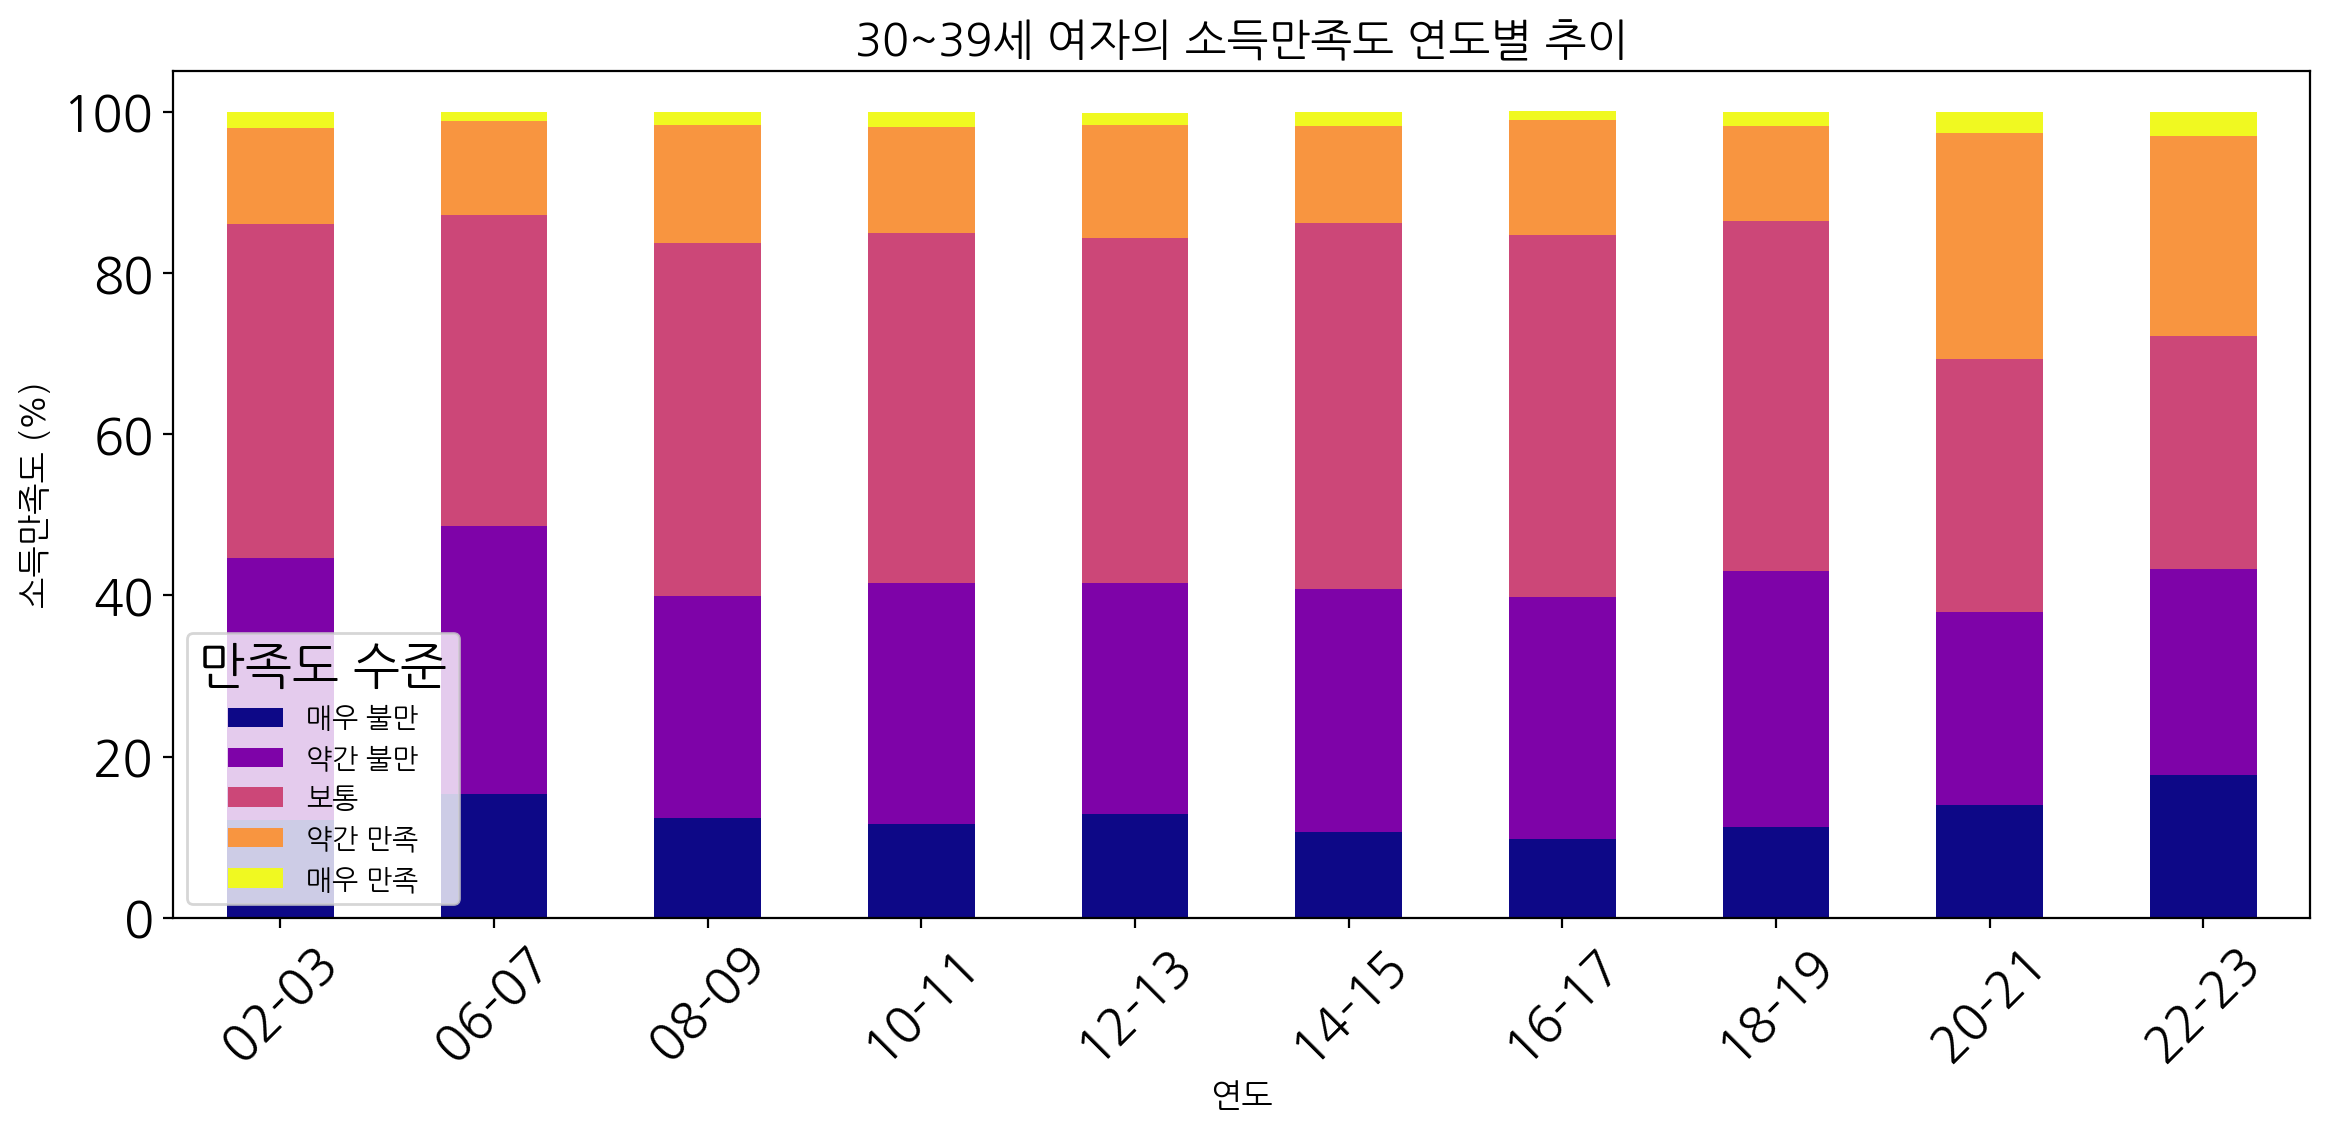

In [16]:
# 데이터 필터링: 연령대를 30~39세로 제한
age_30_39_data = df[(df['성별'] == '여자') & (df['연령대/학력/혼인여부'] == '30~39세')]

# 연도별 항목(만족도 수준)에 따른 소득만족도를 피벗테이블 형태로 변환
age_30_39_pivot1 = age_30_39_data.pivot_table(index='연도', columns='항목', values='소득만족도', aggfunc='mean')

# 현재 항목 순서
current_order = age_30_39_pivot1.columns.tolist()
# 원하는 항목 순서
desired_order = ['매우 불만', '약간 불만', '보통', '약간 만족', '매우 만족']
# 항목 순서 변경
age_30_39_pivot1 = age_30_39_pivot1.reindex(columns=desired_order)

# 바 그래프 생성
age_30_39_pivot1.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='plasma')
plt.title('30~39세 여자의 소득만족도 연도별 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('소득만족도 (%)', fontsize=12)
plt.legend(title='만족도 수준', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



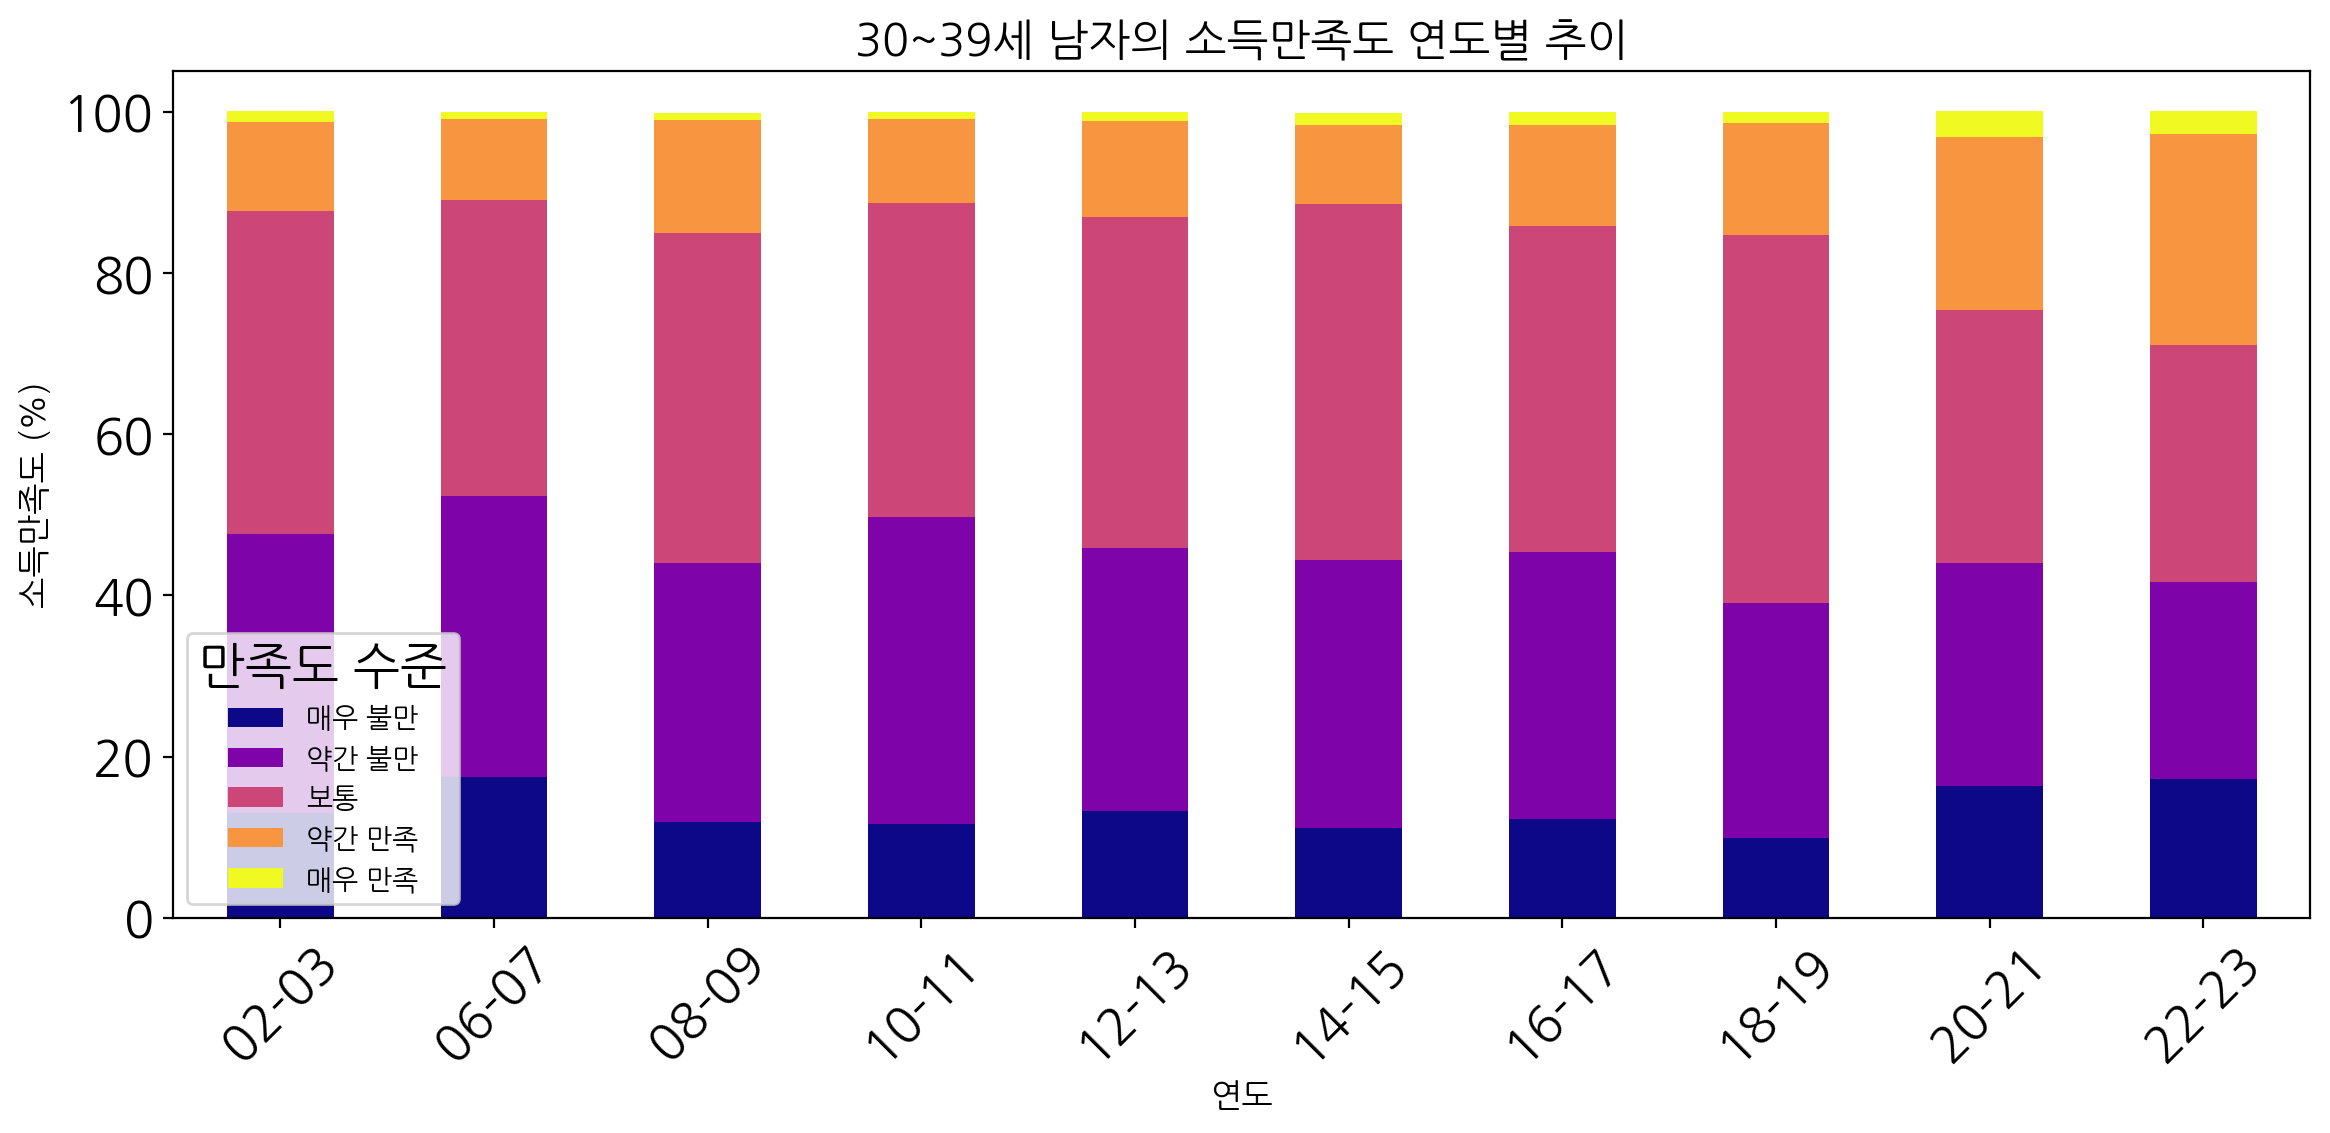

In [17]:
# 데이터 필터링: 연령대를 30~39세로 제한
age_30_39_data = df[(df['성별'] == '남자') & (df['연령대/학력/혼인여부'] == '30~39세')]

# 연도별 항목(만족도 수준)에 따른 소득만족도를 피벗테이블 형태로 변환
age_30_39_pivot2 = age_30_39_data.pivot_table(index='연도', columns='항목', values='소득만족도', aggfunc='mean')

# 현재 항목 순서
current_order = age_30_39_pivot2.columns.tolist()
# 원하는 항목 순서
desired_order = ['매우 불만', '약간 불만', '보통', '약간 만족', '매우 만족']
# 항목 순서 변경
age_30_39_pivot2 = age_30_39_pivot2.reindex(columns=desired_order)

# 바 그래프 생성
age_30_39_pivot2.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='plasma')
plt.title('30~39세 남자의 소득만족도 연도별 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('소득만족도 (%)', fontsize=12)
plt.legend(title='만족도 수준', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



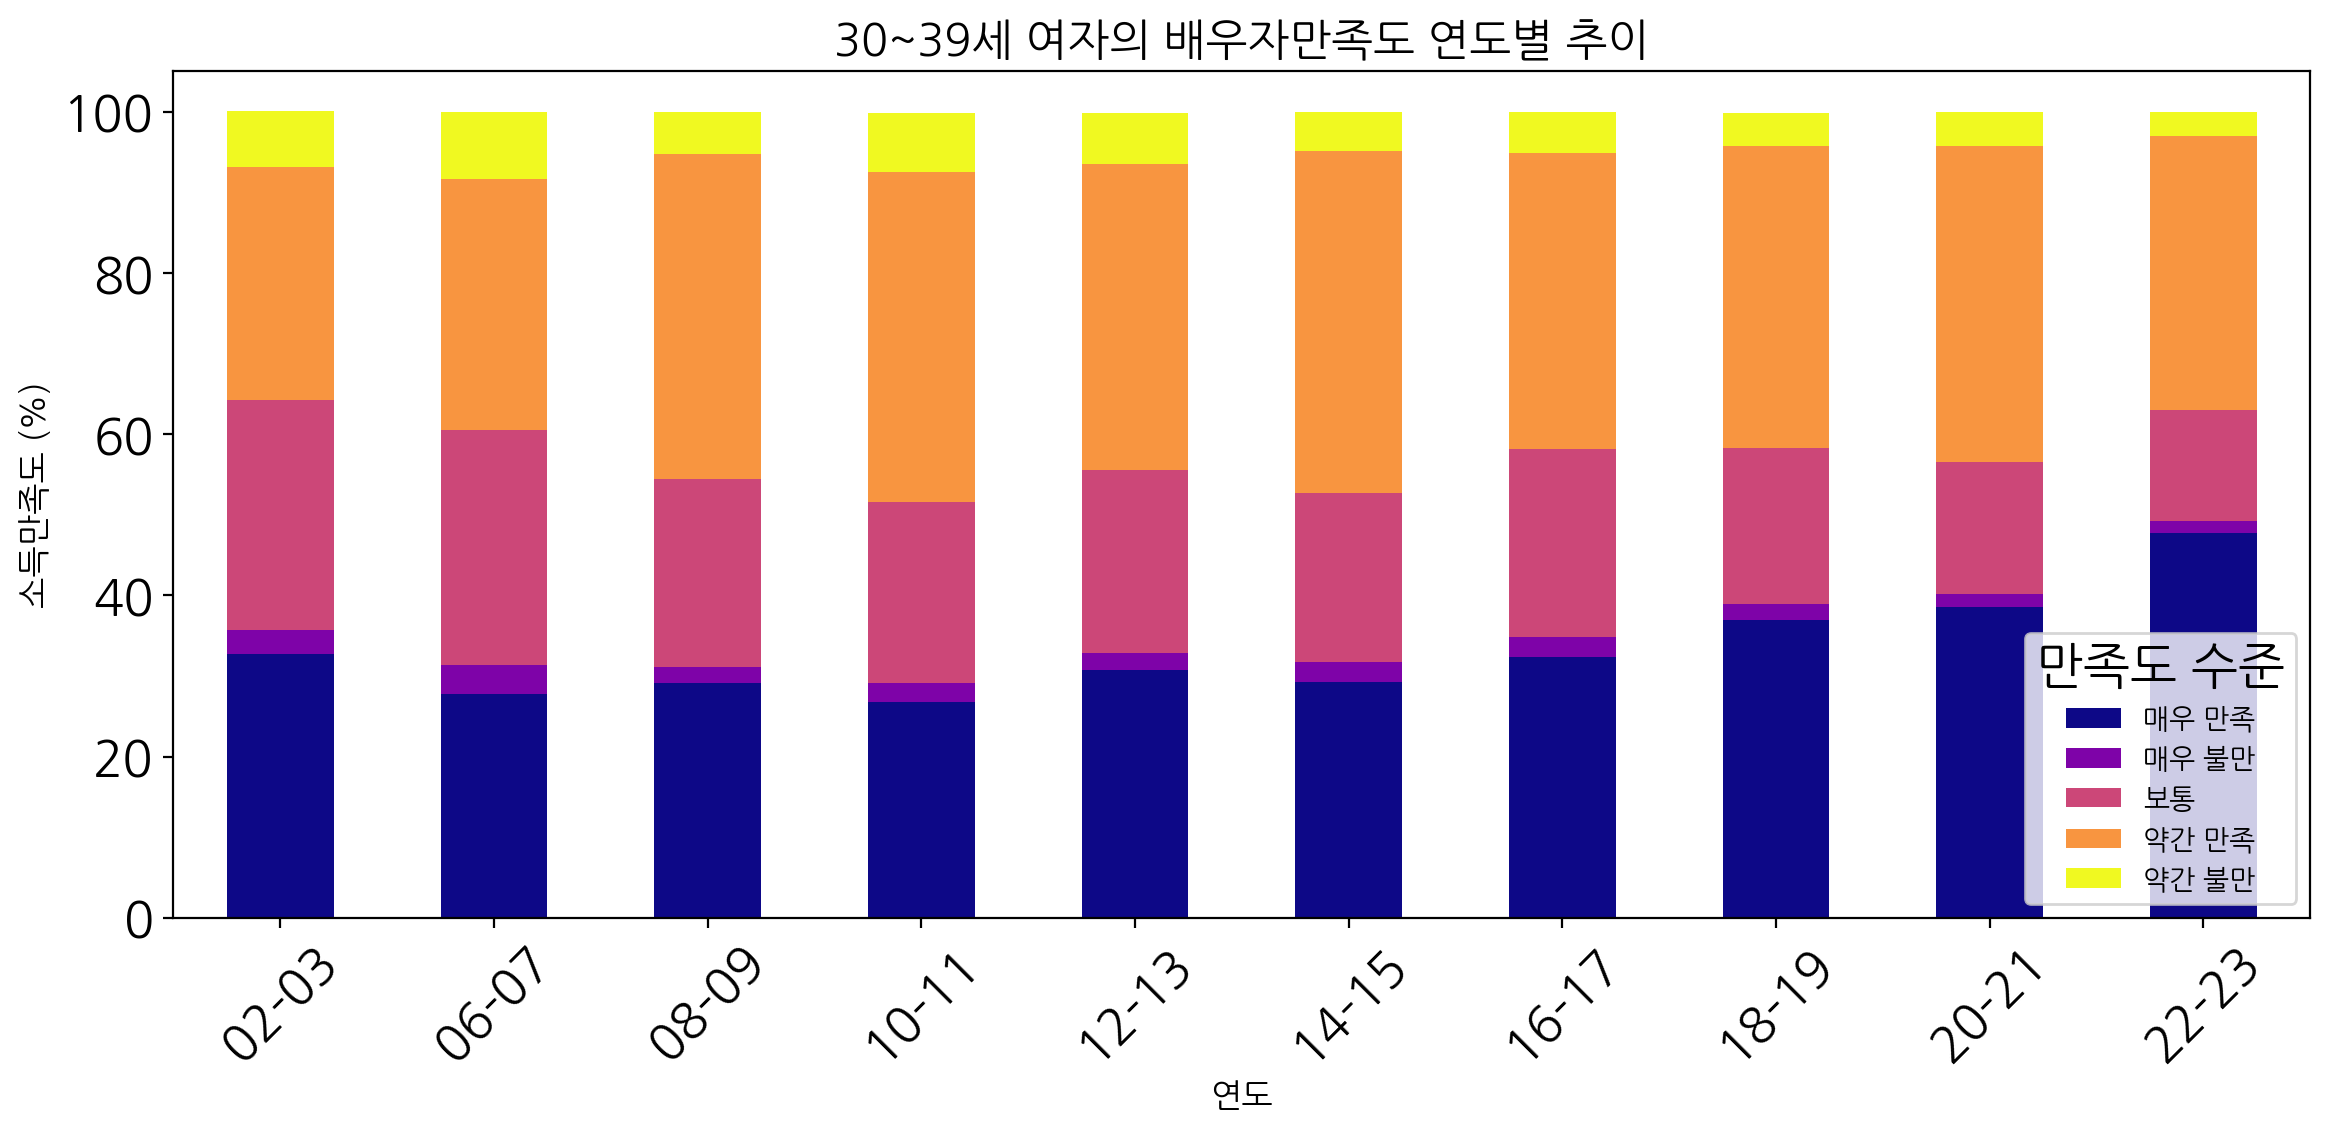

In [8]:
# 데이터 필터링: 연령대를 30~39세로 제한
age_30_39_data = df[(df['성별'] == '여자') & (df['연령대/학력/혼인여부'] == '30~39세')]

# 연도별 항목(만족도 수준)에 따른 소득만족도를 피벗테이블 형태로 변환
age_30_39_pivot = age_30_39_data.pivot_table(index='연도', columns='항목', values='배우자만족도', aggfunc='mean')

# 바 그래프 생성
age_30_39_pivot.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='plasma')
plt.title('30~39세 여자의 배우자만족도 연도별 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('소득만족도 (%)', fontsize=12)
plt.legend(title='만족도 수준', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


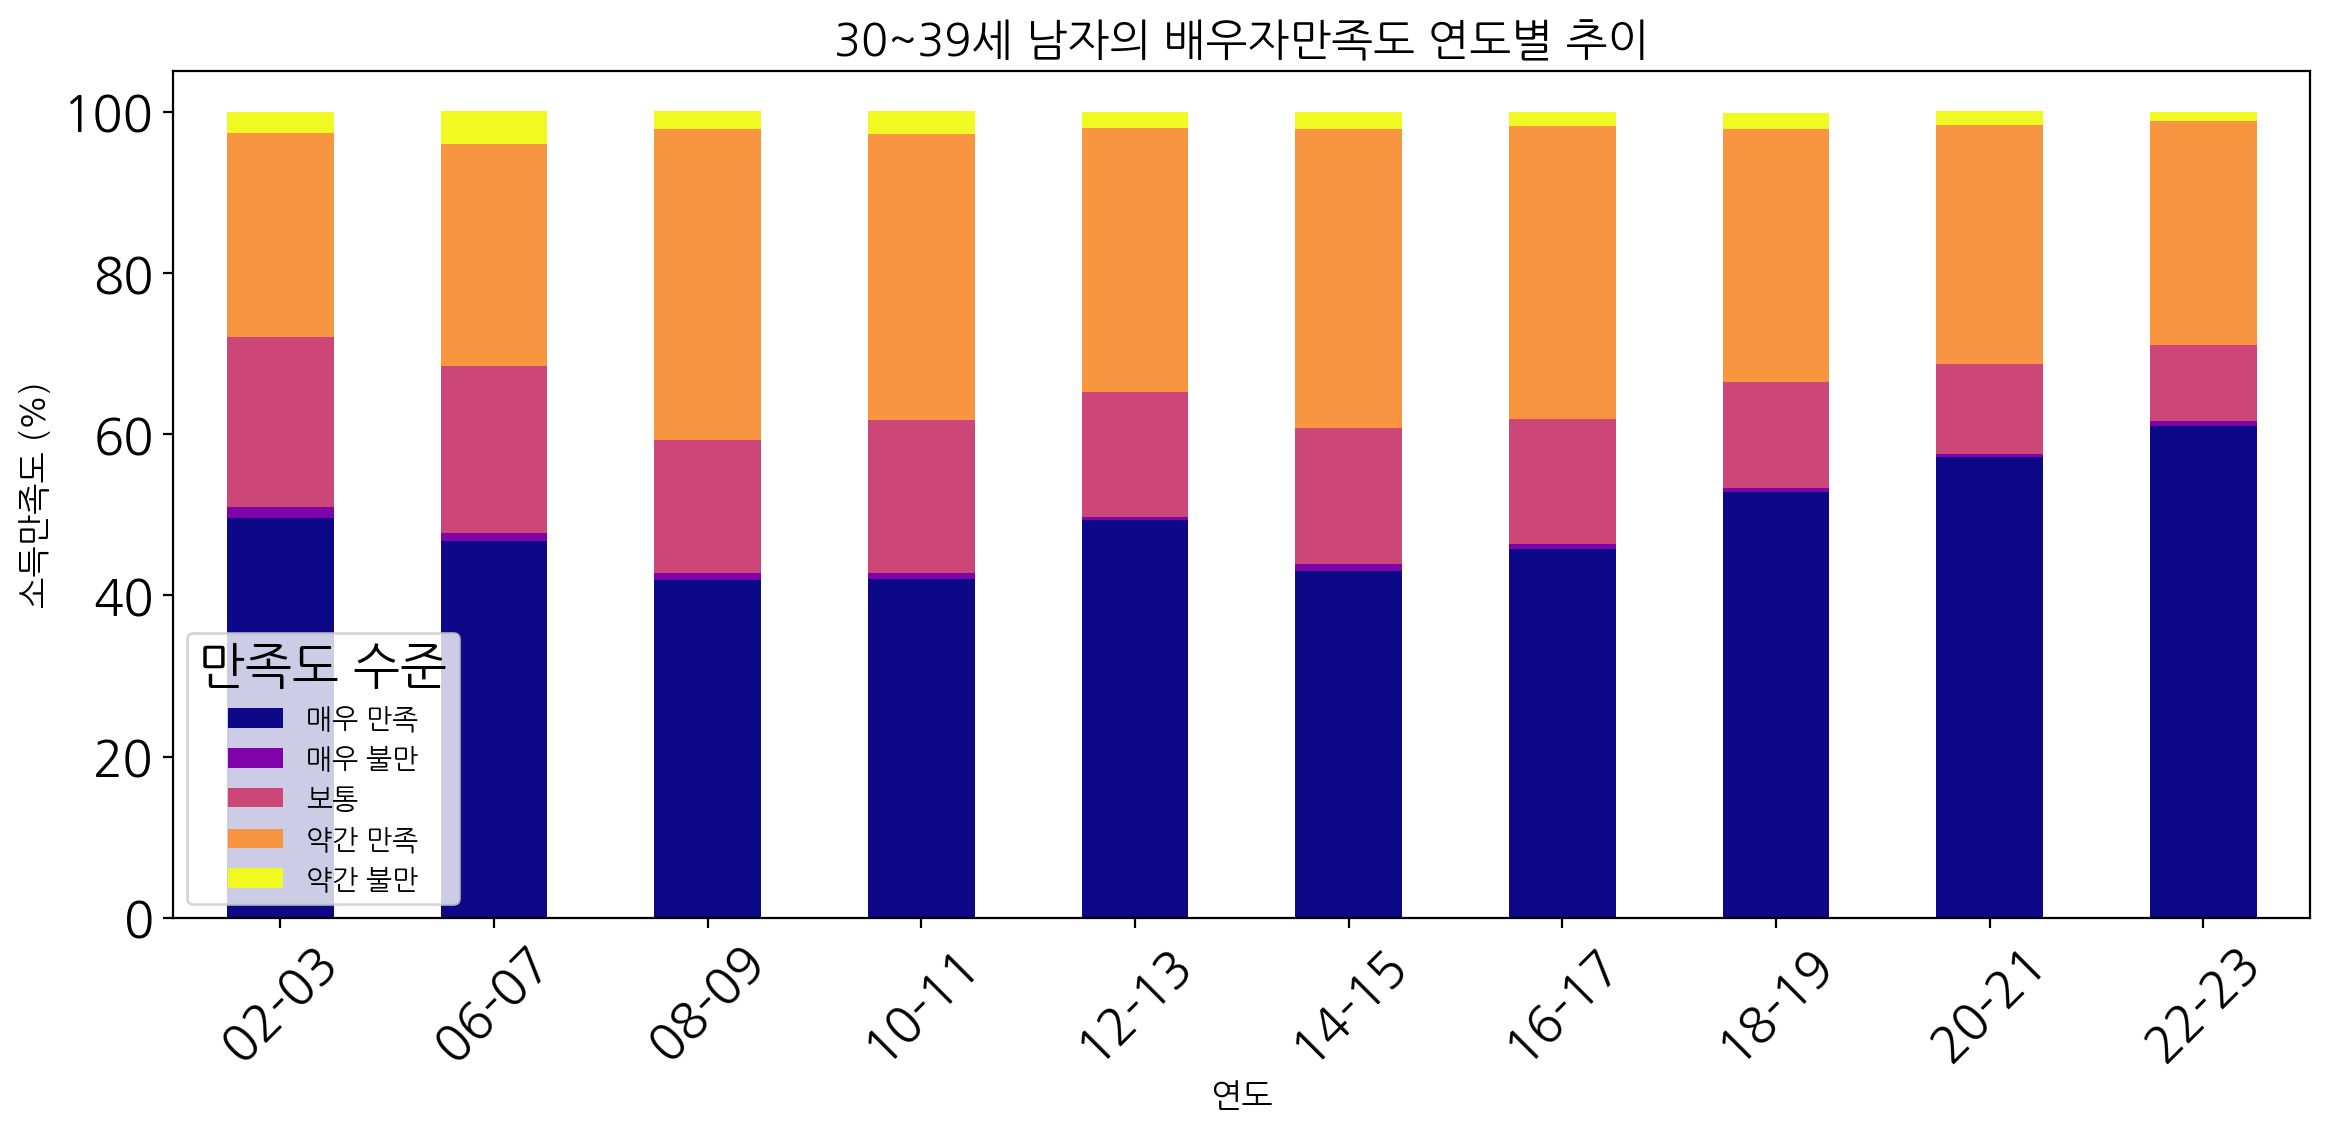

In [9]:
# 데이터 필터링: 연령대를 30~39세로 제한
age_30_39_data = df[(df['성별'] == '남자') & (df['연령대/학력/혼인여부'] == '30~39세')]

# 연도별 항목(만족도 수준)에 따른 소득만족도를 피벗테이블 형태로 변환
age_30_39_pivot = age_30_39_data.pivot_table(index='연도', columns='항목', values='배우자만족도', aggfunc='mean')

# 바 그래프 생성
age_30_39_pivot.plot(kind='bar', figsize=(12, 6), stacked=True, colormap='plasma')
plt.title('30~39세 남자의 배우자만족도 연도별 추이', fontsize=16)
plt.xlabel('연도', fontsize=12)
plt.ylabel('소득만족도 (%)', fontsize=12)
plt.legend(title='만족도 수준', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 만족도에 따른 출산율

In [10]:
birth = pd.read_excel(path + '연령별_출산율_및_합계출산율_행정구역별(전국,서울).xlsx')

birth

,행정구역별,2000,2000.1,2000.2,2000.3,2000.4,2000.5,2000.6,2000.7,2001,...,2022.6,2022.7,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6,2023.7
0,행정구역별,합계출산율 (가임여성 1명당 명),모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명),20~24세 (해당연령 여자인구 1천명당 명),25~29세 (해당연령 여자인구 1천명당 명),30~34세 (해당연령 여자인구 1천명당 명),35~39세 (해당연령 여자인구 1천명당 명),40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명),합계출산율 (가임여성 1명당 명),...,40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명),합계출산율 (가임여성 1명당 명),모의 연령별출산율:15~19세 (해당연령 여자인구 1천명당 명),20~24세 (해당연령 여자인구 1천명당 명),25~29세 (해당연령 여자인구 1천명당 명),30~34세 (해당연령 여자인구 1천명당 명),35~39세 (해당연령 여자인구 1천명당 명),40~44세 (해당연령 여자인구 1천명당 명),45~49세 (해당연령 여자인구 1천명당 명)
1,전국,1.48,2.6,39.2,150.3,84.1,17.6,2.7,0.2,1.309,...,8,0.2,0.721,0.3,3.8,21.4,66.7,43,7.9,0.2
2,서울특별시,1.275,1.3,23.5,121.4,90.2,18.8,2.6,0.2,1.111,...,8.7,0.2,0.552,0.2,1.3,8.5,47.3,43.1,8.7,0.2


In [11]:

birth_rate = [189, 239.4, 256.1,294.8, 311.8, 322, 303.7, 268.7, 240.8, 227.3]

In [12]:
years = age_30_39_pivot.index
years

Index(['02-03', '06-07', '08-09', '10-11', '12-13', '14-15', '16-17', '18-19',
       '20-21', '22-23'],
      dtype='object', name='연도')

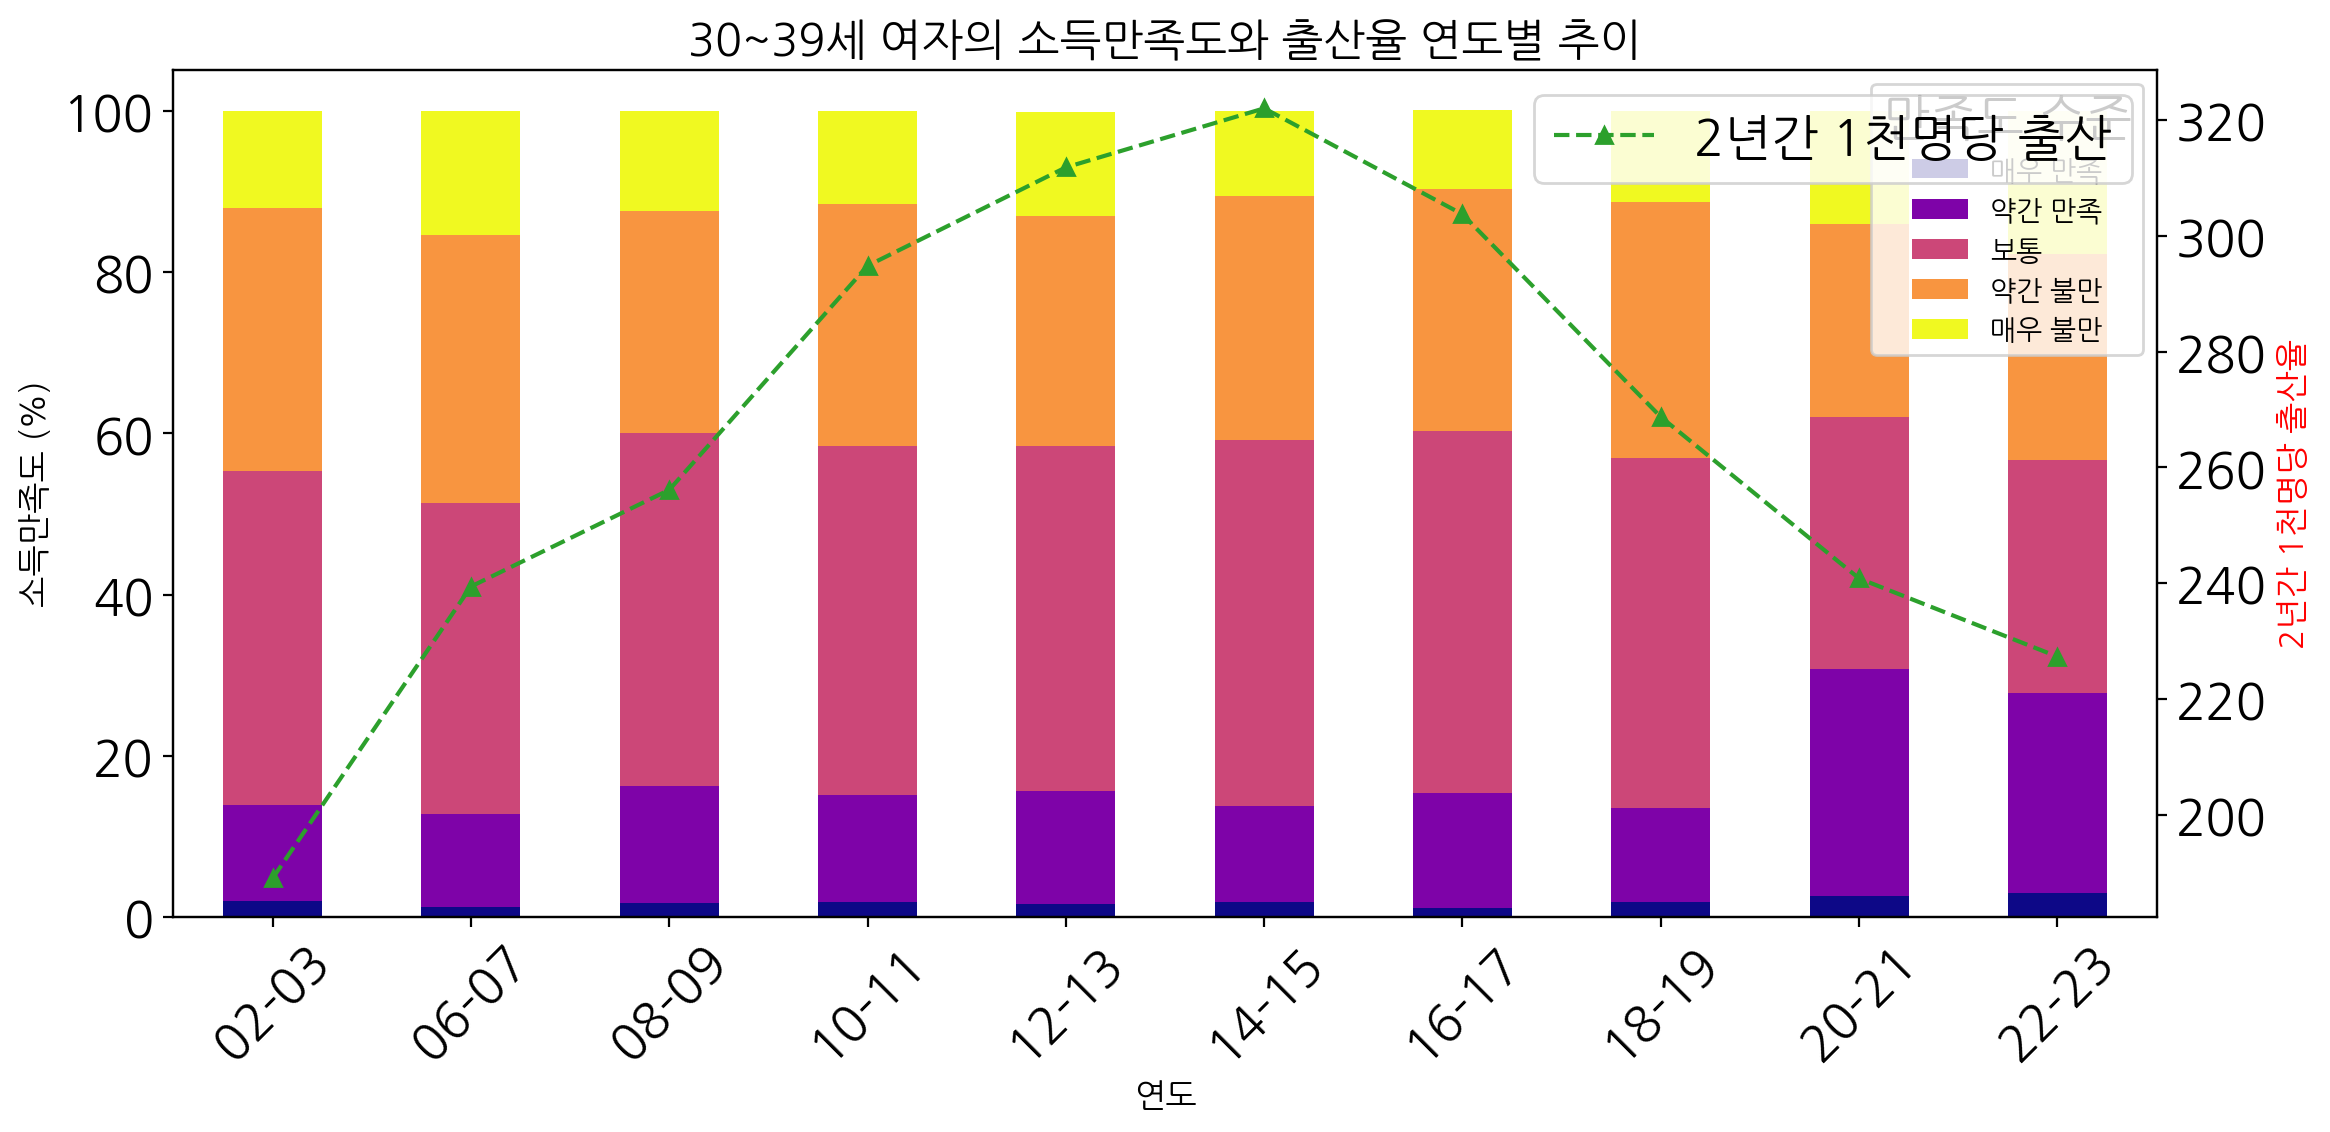

In [15]:

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 소득만족도 그래프
age_30_39_pivot1.plot(kind='bar', stacked=True, colormap='plasma', ax=ax1)
ax1.set_title('30~39세 여자의 소득만족도와 출산율 연도별 추이', fontsize=16)
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('소득만족도 (%)', fontsize=12)
ax1.legend(title='만족도 수준', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# 출산율 그래프 (두 번째 y축 생성)
ax2 = ax1.twinx()
ax2.plot(years, birth_rate, label='2년간 1천명당 출산', marker='^', color='tab:green', linestyle='--')
ax2.set_ylabel('2년간 1천명당 출산율', fontsize=12, color='red')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

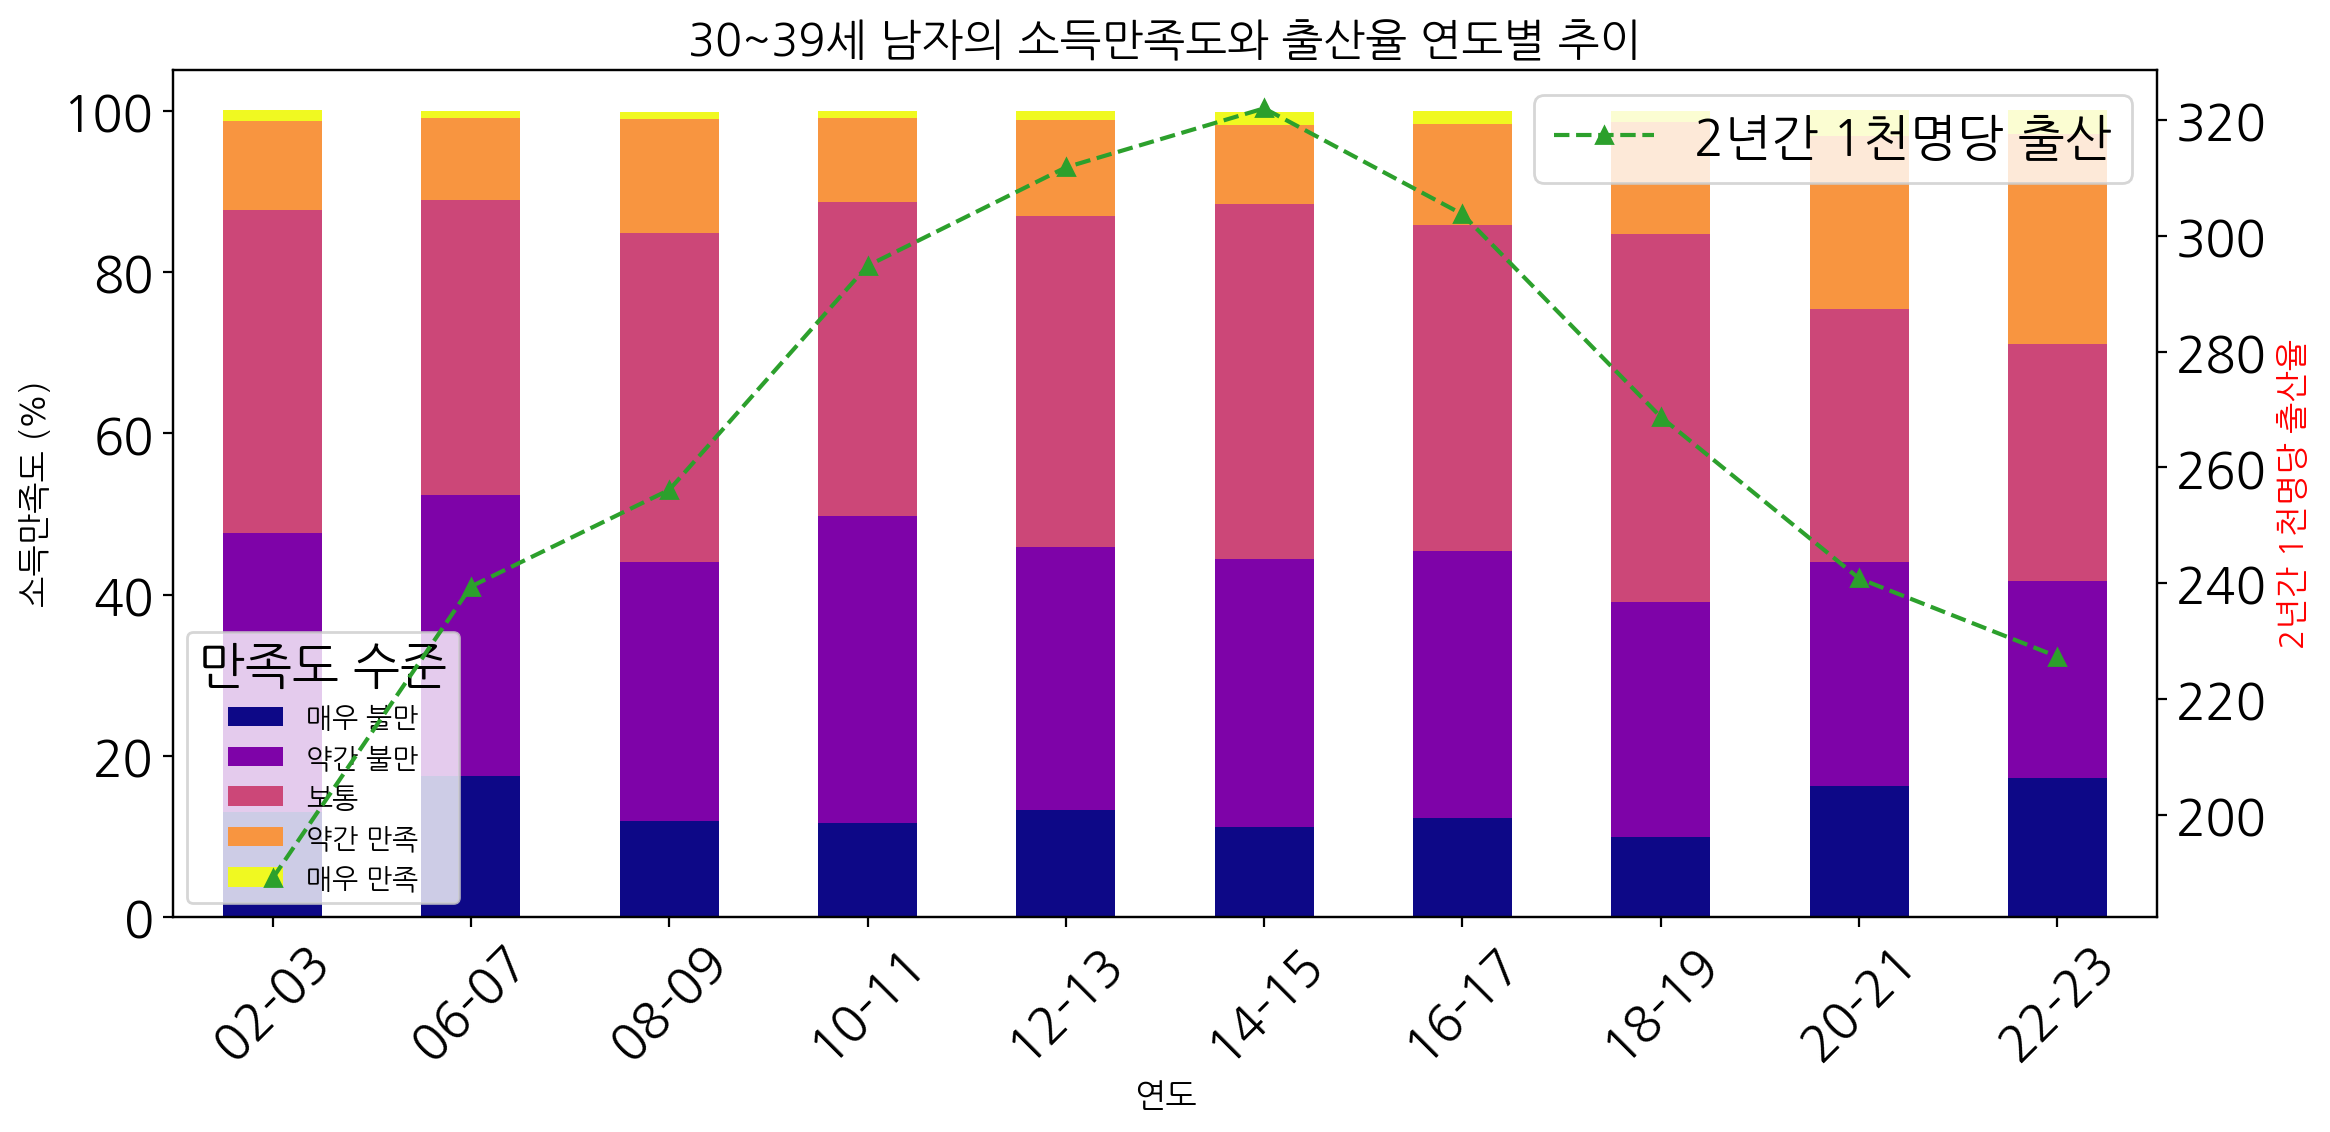

In [18]:

# 그래프 생성
fig, ax1 = plt.subplots(figsize=(12, 6))

# 소득만족도 그래프
age_30_39_pivot2.plot(kind='bar', stacked=True, colormap='plasma', ax=ax1)
ax1.set_title('30~39세 남자의 소득만족도와 출산율 연도별 추이', fontsize=16)
ax1.set_xlabel('연도', fontsize=12)
ax1.set_ylabel('소득만족도 (%)', fontsize=12)
ax1.legend(title='만족도 수준', fontsize=10)
ax1.tick_params(axis='x', rotation=45)

# 출산율 그래프 (두 번째 y축 생성)
ax2 = ax1.twinx()
ax2.plot(years, birth_rate, label='2년간 1천명당 출산', marker='^', color='tab:green', linestyle='--')
ax2.set_ylabel('2년간 1천명당 출산율', fontsize=12, color='red')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()